### Code to implement machine learning model

In [1]:
# Import some libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load data
file = pd.read_csv("Data/Cleaned_Covid19_vaccine_data.csv", encoding='latin1')

In [3]:
file.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,ER_VISIT,HOSPITAL,DISABLE,RECOVD,...,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916710,MO,23.0,F,NaN,Y,NaN,Y,NaN,U,...,Band neutrophil percentage increased,Surgery,White blood cell count increased,NaN,COVID19,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916720,NY,23.0,M,NaN,NaN,NaN,NaN,NaN,Y,...,Dyspnoea,NaN,NaN,NaN,COVID19,MODERNA,1,IM,AR,COVID19 (COVID19 (MODERNA))
2,916741,AR,68.0,F,NaN,NaN,NaN,NaN,Y,N,...,Complex regional pain syndrome,Fatigue,Headache,Joint range of motion decreased,COVID19,PFIZER\BIONTECH,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916741,AR,68.0,F,NaN,NaN,NaN,NaN,Y,N,...,Pain in extremity,Peripheral swelling,X-ray abnormal,NaN,COVID19,PFIZER\BIONTECH,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,916772,GA,55.0,M,NaN,NaN,NaN,NaN,NaN,U,...,SARS-CoV-2 test positive,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))


In [4]:
# missing values in each column
file.isnull().sum()

VAERS_ID              0
STATE              1138
AGE_YRS            1061
SEX                   0
DIED               7347
L_THREAT           7456
ER_VISIT           8577
HOSPITAL           5091
DISABLE            7962
RECOVD              427
NUMDAYS             968
OTHER_MEDS         3322
CUR_ILL            4446
HISTORY            2293
BIRTH_DEFECT       8546
OFC_VISIT          7037
ER_ED_VISIT        5531
ALLERGIES          3948
SYMPTOM1              0
SYMPTOM2           1541
SYMPTOM3           2809
SYMPTOM4           3758
SYMPTOM5           4575
VAX_TYPE              0
VAX_MANU              0
VAX_DOSE_SERIES       2
VAX_ROUTE          2842
VAX_SITE           2351
VAX_NAME              0
dtype: int64

In [5]:
# Fill in the missing values with 0
filled_file = file.fillna(0)

In [6]:
# Check if there are still any missing values
filled_file.isna().sum()

VAERS_ID           0
STATE              0
AGE_YRS            0
SEX                0
DIED               0
L_THREAT           0
ER_VISIT           0
HOSPITAL           0
DISABLE            0
RECOVD             0
NUMDAYS            0
OTHER_MEDS         0
CUR_ILL            0
HISTORY            0
BIRTH_DEFECT       0
OFC_VISIT          0
ER_ED_VISIT        0
ALLERGIES          0
SYMPTOM1           0
SYMPTOM2           0
SYMPTOM3           0
SYMPTOM4           0
SYMPTOM5           0
VAX_TYPE           0
VAX_MANU           0
VAX_DOSE_SERIES    0
VAX_ROUTE          0
VAX_SITE           0
VAX_NAME           0
dtype: int64

In [7]:
filled_file

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,ER_VISIT,HOSPITAL,DISABLE,RECOVD,...,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916710,MO,23.0,F,0,Y,0,Y,0,U,...,Band neutrophil percentage increased,Surgery,White blood cell count increased,0,COVID19,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916720,NY,23.0,M,0,0,0,0,0,Y,...,Dyspnoea,0,0,0,COVID19,MODERNA,1,IM,AR,COVID19 (COVID19 (MODERNA))
2,916741,AR,68.0,F,0,0,0,0,Y,N,...,Complex regional pain syndrome,Fatigue,Headache,Joint range of motion decreased,COVID19,PFIZER\BIONTECH,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916741,AR,68.0,F,0,0,0,0,Y,N,...,Pain in extremity,Peripheral swelling,X-ray abnormal,0,COVID19,PFIZER\BIONTECH,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,916772,GA,55.0,M,0,0,0,0,0,U,...,SARS-CoV-2 test positive,0,0,0,COVID19,PFIZER\BIONTECH,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,1024817,GU,68.0,M,Y,0,0,Y,0,N,...,Blood pressure systolic decreased,Cardio-respiratory arrest,Death,Dialysis,COVID19,PFIZER\BIONTECH,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
8578,1024817,GU,68.0,M,Y,0,0,Y,0,N,...,Gastrointestinal haemorrhage,Mechanical ventilation,Pulse absent,Pulseless electrical activity,COVID19,PFIZER\BIONTECH,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
8579,1024817,GU,68.0,M,Y,0,0,Y,0,N,...,Resuscitation,Seizure like phenomena,Unresponsive to stimuli,Ventricular fibrillation,COVID19,PFIZER\BIONTECH,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
8580,1024853,MA,78.0,F,Y,0,0,0,0,N,...,Aspiration,Death,Fatigue,Haemorrhage,COVID19,MODERNA,UNK,SYR,LA,COVID19 (COVID19 (MODERNA))


In [8]:
# save file
filled_file.to_csv("Cleaned_Covid19_vaccine_25_02_21.csv")

In [9]:
filled_file.shape

(8582, 29)

### Implememt ML models


In [10]:
life_threatening  = np.array(filled_file['L_THREAT'])
hospitalized  = np.array(filled_file['HOSPITAL'])
disabled = np.array(filled_file['DISABLE'])
recoved = np.array(filled_file['RECOVD']) # df with more samples
died = np.array(filled_file['DIED'])


In [13]:
life_threatening[life_threatening == 0] = 'N'
hospitalized[hospitalized == 0] = 'N'
disabled[disabled == 0] = 'N'
recoved[recoved == 0] = 'N'
died[died == 0] = 'N'

#### Drop the unnecessary columns

In [15]:
def drop_columns(df, cols):
    """
    Function to remove columns
    Parameters:
    df: data frame
    cols: columns to remove
    
    """
    df = df.loc[:, ~df.columns.str.contains('|'.join(cols))]
    return(df)
    

In [16]:
# remove the columns that are not needed
cols = ['L_THREAT', 'HOSPITAL', 'DISABLE', 'RECOVD', 'DIED', 'VAX_TYPE',
        'OFC_VISIT', 'ER_ED_VISIT', 'STATE', 'VAX_SITE']
df = drop_columns(df = filled_file, cols=cols)

In [17]:
cat_cols = ['STATE', 'SEX', 'DIED', 'OTHER_MEDS',
           'CUR_ILL', 'HISTORY', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOM2', 
            'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5',
            'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
           'VAX_NAME', 'BIRTH_DEFECT', 'ER_VISIT']



In [18]:
df_cat = df.loc[:, df.columns.str.contains('|'.join(cat_cols))]
df_num = df.loc[:, ~df.columns.str.contains('|'.join(cat_cols))]

In [19]:
df_cat

,SEX,ER_VISIT,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME
0,F,0,Synthroid,0,Hypothyroidism,0,NKDA,Appendicitis,Band neutrophil percentage increased,Surgery,White blood cell count increased,0,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
1,M,0,0,0,0,0,0,Dysphagia,Dyspnoea,0,0,0,MODERNA,1,IM,COVID19 (COVID19 (MODERNA))
2,F,0,phenobarbital 60mg HS hydroxychloroquin 400mg...,had surgery R hand for advanced arthritis 11/1...,Rheumatoid arthritis - mostly affecting R wris...,0,bee stings,Chills,Complex regional pain syndrome,Fatigue,Headache,Joint range of motion decreased,PFIZER\BIONTECH,1,SYR,COVID19 (COVID19 (PFIZER-BIONTECH))
3,F,0,phenobarbital 60mg HS hydroxychloroquin 400mg...,had surgery R hand for advanced arthritis 11/1...,Rheumatoid arthritis - mostly affecting R wris...,0,bee stings,Myalgia,Pain in extremity,Peripheral swelling,X-ray abnormal,0,PFIZER\BIONTECH,1,SYR,COVID19 (COVID19 (PFIZER-BIONTECH))
4,M,0,"Propranolol,zoloft,asa,Lisinipril, Crestor, Pr...",0,"HTN, Insomnia,High Cholesterol,",0,Codeine,Feeling abnormal,SARS-CoV-2 test positive,0,0,0,PFIZER\BIONTECH,UNK,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,M,0,"Meds Prior to hospitalization: Propanolol, ci...","NIDDM, HTN, CAD s/p CABG x4v, liver cirrhosis,...",social history of alcohol abuse,0,Ampicillin sodium,Aspiration,Blood pressure systolic decreased,Cardio-respiratory arrest,Death,Dialysis,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
8578,M,0,"Meds Prior to hospitalization: Propanolol, ci...","NIDDM, HTN, CAD s/p CABG x4v, liver cirrhosis,...",social history of alcohol abuse,0,Ampicillin sodium,Endotracheal intubation,Gastrointestinal haemorrhage,Mechanical ventilation,Pulse absent,Pulseless electrical activity,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
8579,M,0,"Meds Prior to hospitalization: Propanolol, ci...","NIDDM, HTN, CAD s/p CABG x4v, liver cirrhosis,...",social history of alcohol abuse,0,Ampicillin sodium,Respiratory arrest,Resuscitation,Seizure like phenomena,Unresponsive to stimuli,Ventricular fibrillation,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH))
8580,F,0,Chemo,Essential Thrombocytopemia Alzheimer?s,Essential Thrombocytopemia Alzheimer?s,0,None,Abdominal pain upper,Aspiration,Death,Fatigue,Haemorrhage,MODERNA,UNK,SYR,COVID19 (COVID19 (MODERNA))


In [20]:
df_num

,VAERS_ID,AGE_YRS,NUMDAYS
0,916710,23.0,3.0
1,916720,23.0,0.0
2,916741,68.0,1.0
3,916741,68.0,1.0
4,916772,55.0,4.0
...,...,...,...
8577,1024817,68.0,1.0
8578,1024817,68.0,1.0
8579,1024817,68.0,1.0
8580,1024853,78.0,9.0


In [21]:
# one hot encoding
df_dum = pd.get_dummies(df_cat)

In [22]:
df_dum

,SEX_F,SEX_M,SEX_U,ER_VISIT_0,ER_VISIT_Y,OTHER_MEDS_0,"OTHER_MEDS_""allopurinol tablet; 200 mg; oral Once A Day; AM"" ""calcium carbonate tablet,chewable; 1000 mg; oral Once An Evening; PM"" ""ferrous fumarate tablet; 325 mg (106 mg iron); oral S",OTHER_MEDS_#NAME?,"OTHER_MEDS_(1) Acetaminophen 500mg PO Q4H PRN pain (2) Albuterol inhaler 1 puff Q4H PRN (3) Cyanocobalamin 1000mg PO daily (4) Diazepam 5mg PO daily PRN anxiety (5) Ergocalciferol 48,000 units PO daily (6) Fluoxetine 20mg PO daily (7) Arnicare cream 1",OTHER_MEDS_- Invega Trenza 546mg Q3months - Lithium 300mg BID - Oxybutynin 5mg QID - lipitor 20mg QHS - cogentin 2mg BID - Norvasc 5mg QD - Dyazide Capsule 37.5-25 MG (Triamterene-HCTZ) QD,...,VAX_ROUTE_0,VAX_ROUTE_ID,VAX_ROUTE_IM,VAX_ROUTE_OT,VAX_ROUTE_SC,VAX_ROUTE_SYR,VAX_ROUTE_UN,VAX_NAME_COVID19 (COVID19 (MODERNA)),VAX_NAME_COVID19 (COVID19 (PFIZER-BIONTECH)),VAX_NAME_COVID19 (COVID19 (UNKNOWN))
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8578,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8579,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8580,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [23]:
df_dum.shape

(8582, 12614)

In [24]:
# combine data
df_final = pd.concat([df_num, df_dum], axis=1)

### First with all the features

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# create a dictionary of labels
labels = dict({'life_threatening': life_threatening,
               'hospitalized': hospitalized,
               'disabled': disabled,
               'recoved': recoved,
               'died': died,
})

In [31]:
labels['life_threatening']

array(['Y', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [32]:
labels['hospitalized']

array(['Y', 'N', 'N', ..., 'Y', 'N', 'N'], dtype=object)

In [33]:
# Split dataset to select feature and evaluate the classifier
models_bfs = dict()
for key in labels:
    print("Training on ", key)
    X_train, X_test, y_train, y_test = train_test_split(
        df_final, labels[key], test_size = 0.25,
        random_state=0
    )

    clf = make_pipeline(MinMaxScaler(), LinearSVC(max_iter= 2000))
    clf.fit(X_train, y_train)
    models_bfs[key] = clf
    prediction = clf.predict(X_test)
    print('Classification accuracy before feature selection: {:.3f}\n',
    classification_report(y_test, prediction))
#     print('Classification accuracy before feature selection: {:.3f}'
#           .format(clf.score(X_test, y_test)))

Training on  life_threatening
Classification accuracy before feature selection: {:.3f}
               precision    recall  f1-score   support

           N       0.94      0.98      0.96      1861
           Y       0.83      0.56      0.67       285

    accuracy                           0.93      2146
   macro avg       0.88      0.77      0.81      2146
weighted avg       0.92      0.93      0.92      2146

Training on  hospitalized
Classification accuracy before feature selection: {:.3f}
               precision    recall  f1-score   support

           N       0.86      0.89      0.88      1249
           Y       0.84      0.80      0.82       897

    accuracy                           0.85      2146
   macro avg       0.85      0.85      0.85      2146
weighted avg       0.85      0.85      0.85      2146

Training on  disabled
Classification accuracy before feature selection: {:.3f}
               precision    recall  f1-score   support

           N       0.97      1.00      

In [34]:
df_final.shape

(8582, 12617)

### Feature selection

In [35]:
# we will try reducing the features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

class SelectFeatures():
    
    def __init__(self):
        
        """
        Function constructor
        
        """
        self.fit_lis = []
        self.df_imp_lis = []
        
        
    def CallFit(self, df, labels, top_fea):
        """
        Fit model for feature selection. 
        The model will fit the data to find the predictive 
        features for response variable. 
        
        Parameters:
        ----------
        df : List of data frames you want to select features from
        labels : List of response variable. 
        top_fea : Number of features you want to select
        
        """
        top_selected = SelectKBest(score_func = chi2, k = top_fea)
        fit = top_selected.fit(df, labels)
        self.fit_lis.append(fit)
        
        
    
    def UnivFeatureSelection(self, df, index):
        """
        This function will call the fitted models to select the features
        
        Parameters:
        ----------
        df : List of data frames you want to select features from
        index : Index of the model fitted on the data
        
        """
        cols = self.fit_lis[index].get_support(indices=True)
        df_impt_uvs = df.iloc[:,cols]
        self.df_imp_lis.append(df_impt_uvs)
        return self.df_imp_lis


In [37]:
from collections import defaultdict

# features = np.arange(10, 110, 10)
features = np.arange(10, 100, 10)

models_after_fs = defaultdict(list)
accuracy = defaultdict(list)
important_fea = defaultdict(list)
train_test_imp = defaultdict(list)

for i, val in enumerate(features):
    if(val % 10 == 0):
        print("# Features :", val)
    for key in labels:
        print(key)
        FS = SelectFeatures()
        print(features[i])
        FS.CallFit(df = df_final, 
                   labels = labels[key], 
                   top_fea = features[i])
        imp_fea = FS.UnivFeatureSelection(df = df_final, index = 0 )
        important_fea[key].append((val, imp_fea[0]))

        X_train, X_test, y_train, y_test = train_test_split(imp_fea[0], 
                                                            labels[key],
                                                            test_size = 0.25,
                                                            random_state = 0)
        train_test_imp[key].append((val, X_train, X_test, 
                                    y_train, y_test ))

        clf = make_pipeline(StandardScaler(), SVC(max_iter=2000))
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        acc = clf.score(X_test, y_test)
        clf_rep = classification_report(y_test, prediction)
        models_after_fs[key].append((val, clf)) # store #feature and models
        print(clf_rep)
        print("Accuracy :{:.3f}" .format(acc))
        accuracy[key].append((val, acc)) # store #feature and accuracy

# Features : 10
life_threatening
10


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.87      1.00      0.93      1861
           Y       0.42      0.02      0.03       285

    accuracy                           0.87      2146
   macro avg       0.64      0.51      0.48      2146
weighted avg       0.81      0.87      0.81      2146

Accuracy :0.866
hospitalized
10


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.76      0.73      0.75      1249
           Y       0.65      0.69      0.66       897

    accuracy                           0.71      2146
   macro avg       0.70      0.71      0.71      2146
weighted avg       0.71      0.71      0.71      2146

Accuracy :0.711
disabled
10


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.94      1.00      0.97      2000
           Y       1.00      0.05      0.09       146

    accuracy                           0.94      2146
   macro avg       0.97      0.52      0.53      2146
weighted avg       0.94      0.94      0.91      2146

Accuracy :0.935
recoved
10


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.59      0.97      0.73      1167
           U       0.77      0.39      0.52       460
           Y       1.00      0.00      0.00       519

    accuracy                           0.61      2146
   macro avg       0.79      0.45      0.42      2146
weighted avg       0.73      0.61      0.51      2146

Accuracy :0.611
died
10


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.93      1.00      0.96      1845
           Y       1.00      0.53      0.70       301

    accuracy                           0.93      2146
   macro avg       0.96      0.77      0.83      2146
weighted avg       0.94      0.93      0.93      2146

Accuracy :0.935
# Features : 20
life_threatening
20


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.87      1.00      0.93      1861
           Y       0.76      0.06      0.10       285

    accuracy                           0.87      2146
   macro avg       0.82      0.53      0.52      2146
weighted avg       0.86      0.87      0.82      2146

Accuracy :0.872
hospitalized
20


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.83      0.69      0.75      1249
           Y       0.65      0.80      0.72       897

    accuracy                           0.74      2146
   macro avg       0.74      0.75      0.74      2146
weighted avg       0.75      0.74      0.74      2146

Accuracy :0.737
disabled
20


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.94      1.00      0.97      2000
           Y       1.00      0.09      0.16       146

    accuracy                           0.94      2146
   macro avg       0.97      0.54      0.57      2146
weighted avg       0.94      0.94      0.91      2146

Accuracy :0.938
recoved
20


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.60      0.95      0.74      1167
           U       0.80      0.39      0.53       460
           Y       0.51      0.07      0.12       519

    accuracy                           0.62      2146
   macro avg       0.64      0.47      0.46      2146
weighted avg       0.62      0.62      0.54      2146

Accuracy :0.619
died
20


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.94      1.00      0.97      1845
           Y       0.98      0.64      0.77       301

    accuracy                           0.95      2146
   macro avg       0.96      0.82      0.87      2146
weighted avg       0.95      0.95      0.94      2146

Accuracy :0.947
# Features : 30
life_threatening
30


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.88      1.00      0.93      1861
           Y       0.82      0.08      0.15       285

    accuracy                           0.88      2146
   macro avg       0.85      0.54      0.54      2146
weighted avg       0.87      0.88      0.83      2146

Accuracy :0.876
hospitalized
30


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.83      0.71      0.77      1249
           Y       0.66      0.79      0.72       897

    accuracy                           0.75      2146
   macro avg       0.75      0.75      0.74      2146
weighted avg       0.76      0.75      0.75      2146

Accuracy :0.746
disabled
30


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.94      1.00      0.97      2000
           Y       1.00      0.10      0.19       146

    accuracy                           0.94      2146
   macro avg       0.97      0.55      0.58      2146
weighted avg       0.94      0.94      0.92      2146

Accuracy :0.939
recoved
30


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.63      0.93      0.75      1167
           U       0.80      0.40      0.53       460
           Y       0.53      0.20      0.29       519

    accuracy                           0.64      2146
   macro avg       0.65      0.51      0.53      2146
weighted avg       0.64      0.64      0.59      2146

Accuracy :0.638
died
30


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.95      1.00      0.97      1845
           Y       0.98      0.67      0.80       301

    accuracy                           0.95      2146
   macro avg       0.96      0.84      0.89      2146
weighted avg       0.95      0.95      0.95      2146

Accuracy :0.952
# Features : 40
life_threatening
40


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.88      1.00      0.93      1861
           Y       0.88      0.10      0.18       285

    accuracy                           0.88      2146
   macro avg       0.88      0.55      0.56      2146
weighted avg       0.88      0.88      0.83      2146

Accuracy :0.878
hospitalized
40


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.83      0.73      0.78      1249
           Y       0.68      0.79      0.73       897

    accuracy                           0.76      2146
   macro avg       0.76      0.76      0.76      2146
weighted avg       0.77      0.76      0.76      2146

Accuracy :0.758
disabled
40


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.94      1.00      0.97      2000
           Y       1.00      0.18      0.30       146

    accuracy                           0.94      2146
   macro avg       0.97      0.59      0.64      2146
weighted avg       0.95      0.94      0.93      2146

Accuracy :0.944
recoved
40


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.63      0.93      0.75      1167
           U       0.80      0.42      0.55       460
           Y       0.56      0.18      0.27       519

    accuracy                           0.64      2146
   macro avg       0.66      0.51      0.52      2146
weighted avg       0.65      0.64      0.59      2146

Accuracy :0.640
died
40


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.95      1.00      0.97      1845
           Y       0.96      0.70      0.81       301

    accuracy                           0.95      2146
   macro avg       0.96      0.85      0.89      2146
weighted avg       0.95      0.95      0.95      2146

Accuracy :0.954
# Features : 50
life_threatening
50


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.88      1.00      0.94      1861
           Y       0.89      0.12      0.21       285

    accuracy                           0.88      2146
   macro avg       0.89      0.56      0.57      2146
weighted avg       0.88      0.88      0.84      2146

Accuracy :0.881
hospitalized
50


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.82      0.74      0.78      1249
           Y       0.68      0.78      0.73       897

    accuracy                           0.76      2146
   macro avg       0.75      0.76      0.75      2146
weighted avg       0.76      0.76      0.76      2146

Accuracy :0.756
disabled
50


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.95      1.00      0.97      2000
           Y       1.00      0.23      0.37       146

    accuracy                           0.95      2146
   macro avg       0.97      0.61      0.67      2146
weighted avg       0.95      0.95      0.93      2146

Accuracy :0.947
recoved
50


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.61      0.95      0.74      1167
           U       0.80      0.42      0.55       460
           Y       0.60      0.10      0.17       519

    accuracy                           0.63      2146
   macro avg       0.67      0.49      0.49      2146
weighted avg       0.65      0.63      0.56      2146

Accuracy :0.631
died
50


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.95      0.99      0.97      1845
           Y       0.96      0.71      0.81       301

    accuracy                           0.95      2146
   macro avg       0.95      0.85      0.89      2146
weighted avg       0.95      0.95      0.95      2146

Accuracy :0.954
# Features : 60
life_threatening
60


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.88      1.00      0.94      1861
           Y       0.85      0.14      0.24       285

    accuracy                           0.88      2146
   macro avg       0.87      0.57      0.59      2146
weighted avg       0.88      0.88      0.84      2146

Accuracy :0.882
hospitalized
60


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.82      0.75      0.78      1249
           Y       0.69      0.77      0.73       897

    accuracy                           0.76      2146
   macro avg       0.75      0.76      0.75      2146
weighted avg       0.76      0.76      0.76      2146

Accuracy :0.758
disabled
60


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.95      1.00      0.97      2000
           Y       1.00      0.27      0.42       146

    accuracy                           0.95      2146
   macro avg       0.97      0.63      0.70      2146
weighted avg       0.95      0.95      0.94      2146

Accuracy :0.950
recoved
60


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.61      0.95      0.74      1167
           U       0.80      0.40      0.54       460
           Y       0.54      0.09      0.15       519

    accuracy                           0.62      2146
   macro avg       0.65      0.48      0.48      2146
weighted avg       0.63      0.62      0.55      2146

Accuracy :0.624
died
60


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.95      0.99      0.97      1845
           Y       0.95      0.71      0.81       301

    accuracy                           0.95      2146
   macro avg       0.95      0.85      0.89      2146
weighted avg       0.95      0.95      0.95      2146

Accuracy :0.954
# Features : 70
life_threatening
70


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.89      1.00      0.94      1861
           Y       0.88      0.19      0.31       285

    accuracy                           0.89      2146
   macro avg       0.89      0.59      0.62      2146
weighted avg       0.89      0.89      0.86      2146

Accuracy :0.889
hospitalized
70


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.83      0.76      0.79      1249
           Y       0.70      0.78      0.74       897

    accuracy                           0.77      2146
   macro avg       0.76      0.77      0.76      2146
weighted avg       0.77      0.77      0.77      2146

Accuracy :0.767
disabled
70


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.95      1.00      0.97      2000
           Y       1.00      0.28      0.44       146

    accuracy                           0.95      2146
   macro avg       0.98      0.64      0.71      2146
weighted avg       0.95      0.95      0.94      2146

Accuracy :0.951
recoved
70


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.61      0.96      0.74      1167
           U       0.80      0.40      0.54       460
           Y       0.57      0.08      0.14       519

    accuracy                           0.63      2146
   macro avg       0.66      0.48      0.47      2146
weighted avg       0.64      0.63      0.55      2146

Accuracy :0.625
died
70


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.96      0.99      0.98      1845
           Y       0.94      0.74      0.83       301

    accuracy                           0.96      2146
   macro avg       0.95      0.87      0.90      2146
weighted avg       0.96      0.96      0.95      2146

Accuracy :0.957
# Features : 80
life_threatening
80


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.89      1.00      0.94      1861
           Y       0.89      0.20      0.32       285

    accuracy                           0.89      2146
   macro avg       0.89      0.60      0.63      2146
weighted avg       0.89      0.89      0.86      2146

Accuracy :0.890
hospitalized
80


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.81      0.76      0.78      1249
           Y       0.69      0.75      0.72       897

    accuracy                           0.76      2146
   macro avg       0.75      0.76      0.75      2146
weighted avg       0.76      0.76      0.76      2146

Accuracy :0.756
disabled
80


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.95      1.00      0.97      2000
           Y       1.00      0.28      0.44       146

    accuracy                           0.95      2146
   macro avg       0.98      0.64      0.71      2146
weighted avg       0.95      0.95      0.94      2146

Accuracy :0.951
recoved
80


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.61      0.96      0.75      1167
           U       0.81      0.40      0.54       460
           Y       0.62      0.09      0.16       519

    accuracy                           0.63      2146
   macro avg       0.68      0.49      0.48      2146
weighted avg       0.66      0.63      0.56      2146

Accuracy :0.633
died
80


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.96      0.99      0.98      1845
           Y       0.94      0.74      0.83       301

    accuracy                           0.96      2146
   macro avg       0.95      0.87      0.90      2146
weighted avg       0.96      0.96      0.95      2146

Accuracy :0.957
# Features : 90
life_threatening
90


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.89      1.00      0.94      1861
           Y       0.88      0.20      0.33       285

    accuracy                           0.89      2146
   macro avg       0.88      0.60      0.64      2146
weighted avg       0.89      0.89      0.86      2146

Accuracy :0.890
hospitalized
90


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.81      0.76      0.78      1249
           Y       0.69      0.75      0.72       897

    accuracy                           0.75      2146
   macro avg       0.75      0.75      0.75      2146
weighted avg       0.76      0.75      0.76      2146

Accuracy :0.755
disabled
90


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.95      1.00      0.97      2000
           Y       1.00      0.28      0.44       146

    accuracy                           0.95      2146
   macro avg       0.98      0.64      0.71      2146
weighted avg       0.95      0.95      0.94      2146

Accuracy :0.951
recoved
90


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.61      0.96      0.75      1167
           U       0.81      0.42      0.55       460
           Y       0.59      0.10      0.17       519

    accuracy                           0.63      2146
   macro avg       0.67      0.49      0.49      2146
weighted avg       0.65      0.63      0.57      2146

Accuracy :0.635
died
90


/Users/agazwani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           N       0.96      0.99      0.97      1845
           Y       0.92      0.74      0.82       301

    accuracy                           0.96      2146
   macro avg       0.94      0.87      0.90      2146
weighted avg       0.95      0.96      0.95      2146

Accuracy :0.955


In [38]:
accuracy_df = [(k, *t) for k, v in accuracy.items() for t in v]
accuracy_df = pd.DataFrame(accuracy_df, columns=['Variable','features_num','accuracy'])
accuracy_df

,Variable,features_num,accuracy
0,life_threatening,10,0.866263
1,life_threatening,20,0.872321
2,life_threatening,30,0.875582
3,life_threatening,40,0.878378
4,life_threatening,50,0.881174
5,life_threatening,60,0.882106
6,life_threatening,70,0.888630
7,life_threatening,80,0.890028
8,life_threatening,90,0.890494
9,hospitalized,10,0.711090


In [39]:
# get the rows with ms
idx = accuracy_df.loc[accuracy_df.groupby('Variable')['accuracy'].idxmax()]
idx

,Variable,features_num,accuracy
42,died,70,0.957130
24,disabled,70,0.951072
15,hospitalized,70,0.767474
8,life_threatening,90,0.890494
30,recoved,40,0.640261


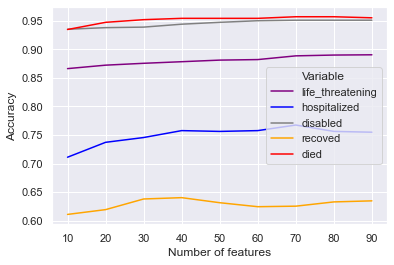

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(font_scale = 1)
ax = sns.lineplot(
    data=accuracy_df,
    x="features_num", y="accuracy",
    palette=['purple', 'blue', 'grey', 'orange', 'red'],
    hue="Variable"
)
ax.set(xlabel='Number of features', ylabel='Accuracy')
plt.show()

In [240]:
important_fea['life_threatning'][4][1]
important_fea['life_threatning'][4][1].to_csv("Data/Important features predicting Life threatning illness.csv")

In [241]:
important_fea['hospitalized'][4][1]
important_fea['hospitalized'][4][1].to_csv("Data/Important features predicting Hospitalized.csv")

In [242]:
important_fea['disabled'][4][1]
important_fea['disabled'][4][1].to_csv("Data/Important features predicting disabled.csv")

In [243]:
important_fea['recoved'][4][1]
important_fea['recoved'][4][1].to_csv("Data/Important features predicting Recovered.csv")

In [244]:
important_fea['died'][4][1]
important_fea['died'][4][1].to_csv("Data/Important features predicting Died.csv")